<a href="https://colab.research.google.com/github/Samraddhi-Gupta/vision-image-transformers/blob/main/flower_classfifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install q kaggle

In [17]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mgiitkd","key":"5966abc4ca0269eb415948447adbc8e3"}'}

In [18]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [19]:
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle kernels pull abdulrahmankhaled1/flowers-classification-cnn-mobilnet

Source code downloaded to /content/flowers-classification-cnn-mobilnet.ipynb


In [21]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [22]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

dataset_dir = keras.utils.get_file(fname = 'flower_photos' , origin = dataset_url , cache_dir='.',untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [23]:
import pathlib

datadir = pathlib.Path(dataset_dir)
datadir

PosixPath('datasets/flower_photos')

In [24]:
flowers = {'daisy' : list(datadir.glob("daisy/*")),
'dandelion' : list(datadir.glob("dandelion/*")),
'roses' : list(datadir.glob("roses/*")),
'sunflowers' : list(datadir.glob("sunflowers/*")),
'tulips' : list(datadir.glob("tulips/*"))}

lables = {
    'daisy' : 0 ,
    'dandelion' : 1 ,
    'roses' : 2,
    'sunflowers' : 3 ,
    'tulips' :4
}

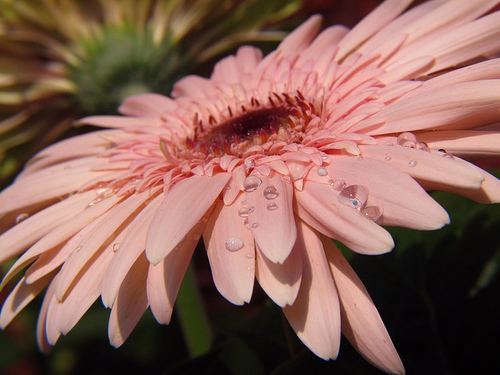

In [25]:
PIL.Image.open(str(flowers['daisy'][0]))

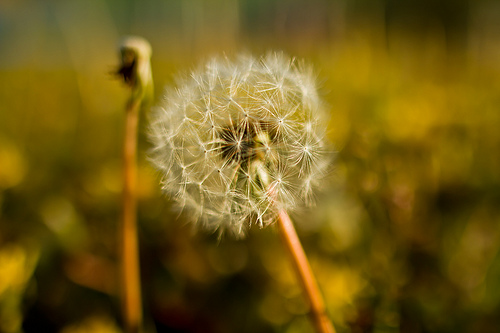

In [26]:
PIL.Image.open(str(flowers['dandelion'][0]))

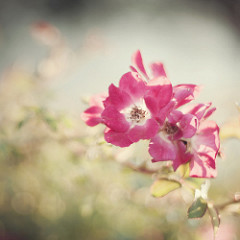

In [27]:
PIL.Image.open(str(flowers['roses'][8]))

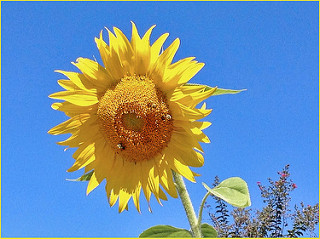

In [28]:
PIL.Image.open(str(flowers['sunflowers'][10]))

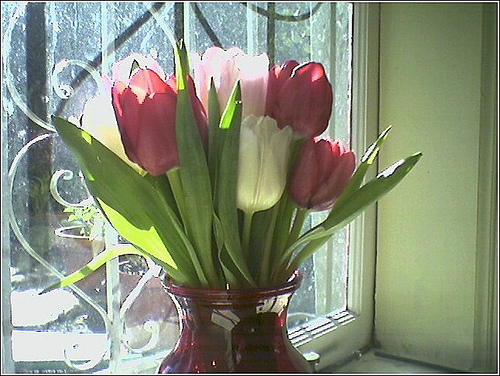

In [29]:


PIL.Image.open(str(flowers['tulips'][6]))



In [30]:
x =[]
y = []

for image_name , image in flowers.items():
  for img in image :
    img = cv2.imread(str(img)) # converts image form its dir to np array to represent image
    resized = cv2.resize(img , (224,224))
    x.append(resized)
    y.append(lables[image_name])

In [31]:
x = np.array(x)
y = np.array(y)

In [32]:
x_train , x_test , y_train , y_test  = train_test_split(x,y , test_size=.2 , stratify = y)

In [33]:
# scalin data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [36]:
from tensorflow import keras

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(224, 224, 3)),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model = keras.models.Sequential([

    data_augmentation,

    keras.layers.Conv2D(filters = 16,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 128,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(5,activation = 'softmax')
])

In [38]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [39]:
model.fit(x_train_scaled,y_train , epochs = 30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.2963 - loss: 1.5326
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4883 - loss: 1.1704
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.5383 - loss: 1.0886
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5918 - loss: 0.9882
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6006 - loss: 0.9549
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.6405 - loss: 0.9122
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6579 - loss: 0.8391
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.6713 - loss: 0.8473
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.6833 - loss: 0.7970
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.6775 - loss: 0.8000
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6951 - loss: 0.7924
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy:

In [41]:
import numpy as np
x_test_scaled = np.array(x_test_scaled)
y_test = np.array(y_test)


In [42]:
print("x_test_scaled shape:", x_test_scaled.shape)
print("y_test shape:", y_test.shape)


x_test_scaled shape: (734, 224, 224, 3)
y_test shape: (734,)


In [43]:
try:
    model.evaluate(x_test_scaled, y_test)
except Exception as e:
    print("Error during evaluation:", str(e))


23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 453ms/step - accuracy: 0.7699 - loss: 0.6142


In [44]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [53]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.7699 - loss: 0.6142
Test accuracy: 0.7534, Test loss: 0.6469
